In [52]:
import numpy as np
import nnet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


In [32]:
X = np.load('X.npy')
Y = np.load('Y.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

In [56]:
## Using the program to fit the notMNIST dataset
n,m = X.shape
W1 = np.random.normal(size=(m,128))
B1 = np.random.normal(size=(128,))
W2 = np.random.normal(size=(128,64))
B2 = np.random.normal(size=(64,))
W3 = np.random.normal(size=(64,10))
B3 = np.random.normal(size=(10,))


weight =[W1,W2,W3]
bias   = [B1,B2,B3]
cursor = 0
num_steps = 3000
batch_size = 200

In [57]:
loss_list = []
for i in range(num_steps):
    x,y = nnet.feed(X,Y,batch_size,cursor = 0)
    los, weight,bias = nnet.Neural_network(X,Y,weight,bias,0.0005,1)
    loss_list.append(los)

21.2409093842


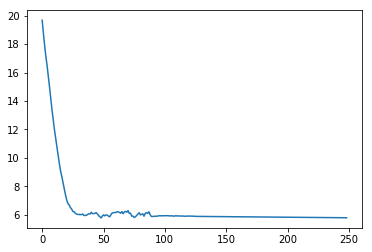

In [49]:
plt.plot(loss_list)
plt.show()

In [50]:
loss_list[-1]

5.7925422941986602

In [53]:
W1 = weight[0]
B1 = bias[0]
W2 = weight[1]
B2 = bias[1]
W3 = weight[2]
B3 = bias[2]

Z1_t = np.matmul(X,weight[0]) +bias[0]
Z1 = 10*normalize(Z1_t, axis = 1, norm = 'max')

A1 = np.maximum(Z1,0)

Z2_t = np.matmul(A1,weight[1]) +bias[1]
Z2 = 10*normalize(Z2_t, axis = 1, norm = 'max')

A2 = np.maximum(Z2,0)

Z3_t = np.matmul(A2,weight[2]) +bias[2]
Z3 = 10*normalize(Z3_t, axis = 1, norm = 'max')

A3 = nnet.activation_sigmoid(Z3)

C:\Users\ashut\Desktop\work\python\SDS 385\Final_Project\Final_Code\nnet.py:40: RuntimeWarning: overflow encountered in exp
  z = np.exp(i)
C:\Users\ashut\Desktop\work\python\SDS 385\Final_Project\Final_Code\nnet.py:41: RuntimeWarning: invalid value encountered in true_divide
  p = z/(1+ np.sum(z))


In [55]:
ll = 0
for i in range(len(Y)):
    if np.argmax(A3[i]) == np.argmax(Y[i]):
        ll +=1
print("training set accuracy is ", (ll*100)/len(Y))

training set accuracy is  69.964
